In [1]:
pip install dask[dataframe]

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 241.9/241.9 kB 7.2 MB/s eta 0:00:00
     ------------------------------------- 242.8/242.8 kB 14.5 MB/s eta 0:00:00
     ------------------------------------- 241.7/241.7 kB 14.5 MB/s eta 0:00:00
     ------------------------------------- 206.6/206.6 kB 13.1 MB/s eta 0:00:00
     ------------------------------------- 205.9/205.9 kB 13.0 MB/s eta 0:00:00
     ------------------------------------- 205.9/205.9 kB 13.0 MB/s eta 0:00:00
     ------------------------------------- 205.7/205.7 kB 12.2 MB/s eta 0:00:00
     ------------------------------------- 205.5/205.5 kB 12.2 MB/s eta 0:00:00
     ------------------------------------- 205.4/205.4 kB 12.2 MB/s eta 0:00:00
     ------------------------------------- 205.1/205.1 kB 12.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [4]:
#Load the data using pandas read_csv function. This will generate a data frame we will use through the work.
cleaned_goalkeepers_df = pd.read_csv('goalkeepers_rating_2.csv')
cleaned_midfielders_df = pd.read_csv('midfielders_rating_2.csv')
cleaned_forwarders_df = pd.read_csv('forwarders_rating_2.csv')
cleaned_defenders_df = pd.read_csv('defenders_rating_2.csv')

In [5]:
#Show the first and last few records to check data is loading correctly
print(cleaned_goalkeepers_df.head())
print(cleaned_goalkeepers_df.tail())

  competition        date              player  goals  assists  shots_ontarget  \
0   Euro 2016  2016-06-10  Ciprian Tatarusanu      0        0               0   
1   Euro 2016  2016-06-10  Ciprian Tatarusanu      0        0               0   
2   Euro 2016  2016-06-10  Ciprian Tatarusanu      0        0               0   
3   Euro 2016  2016-06-10         Hugo Lloris      0        0               0   
4   Euro 2016  2016-06-10         Hugo Lloris      0        0               0   

   shots_offtarget  shotsblocked  chances2score  drib_success  ...  \
0                0             0              0             0  ...   
1                0             0              0             0  ...   
2                0             0              0             0  ...   
3                0             0              0             0  ...   
4                0             0              0             0  ...   

   missed_penalties  owngoals  degree_centrality  betweenness_centrality  \
0               

In [6]:
#shape
cleaned_goalkeepers_df.shape

(4015, 53)

In [7]:
#check the single values of the columns

In [8]:
import pandas as pd

df = cleaned_goalkeepers_df

# Iterate through each column and check for columns with a single unique value
single_value_columns = [column for column in df.columns if df[column].nunique() == 1]

# Print columns with a single unique value
print("Columns with a single unique value:")
for column in single_value_columns:
    print(column)

Columns with a single unique value:
goals
shots_ontarget
rcards
offsides
missed_penalties
flow_success
minutesPlayed


In [9]:
#we dropped the columns, that has single value in the dataset and it is known that all goal leepers here played for 90 minutes as well

columns_to_drop = ['goals',
'shots_ontarget',
'rcards',
'offsides',
'missed_penalties',
'flow_success',
'minutesPlayed']

# Dropping the columns and retaining the name goalkeepers_df
cleaned_goalkeepers_df = cleaned_goalkeepers_df.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned dataframe to verify
cleaned_goalkeepers_df.head()

,competition,date,player,assists,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,...,saves_itb,saves_otb,saved_pen,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,game_duration
0,Euro 2016,2016-06-10,Ciprian Tatarusanu,0,0,0,0,0,0,0,...,2,3,0,0,0.785714,0.076854,0.574830,0.130435,0.0,90
1,Euro 2016,2016-06-10,Ciprian Tatarusanu,0,0,0,0,0,0,0,...,2,3,0,0,0.785714,0.076854,0.574830,0.130435,0.0,90
2,Euro 2016,2016-06-10,Ciprian Tatarusanu,0,0,0,0,0,0,0,...,2,3,0,0,0.785714,0.076854,0.574830,0.130435,0.0,90
3,Euro 2016,2016-06-10,Hugo Lloris,0,0,0,0,0,0,0,...,1,0,0,0,0.642857,0.041239,0.548701,0.109589,0.0,90
4,Euro 2016,2016-06-10,Hugo Lloris,0,0,0,0,0,0,0,...,1,0,0,0,0.642857,0.041239,0.548701,0.109589,0.0,90


In [10]:
cleaned_goalkeepers_df.head()

,competition,date,player,assists,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,...,saves_itb,saves_otb,saved_pen,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,game_duration
0,Euro 2016,2016-06-10,Ciprian Tatarusanu,0,0,0,0,0,0,0,...,2,3,0,0,0.785714,0.076854,0.574830,0.130435,0.0,90
1,Euro 2016,2016-06-10,Ciprian Tatarusanu,0,0,0,0,0,0,0,...,2,3,0,0,0.785714,0.076854,0.574830,0.130435,0.0,90
2,Euro 2016,2016-06-10,Ciprian Tatarusanu,0,0,0,0,0,0,0,...,2,3,0,0,0.785714,0.076854,0.574830,0.130435,0.0,90
3,Euro 2016,2016-06-10,Hugo Lloris,0,0,0,0,0,0,0,...,1,0,0,0,0.642857,0.041239,0.548701,0.109589,0.0,90
4,Euro 2016,2016-06-10,Hugo Lloris,0,0,0,0,0,0,0,...,1,0,0,0,0.642857,0.041239,0.548701,0.109589,0.0,90


In [11]:
#using saves as the target variable
# Combine saves_itb and saves_otb into a single saves metric
cleaned_goalkeepers_df['total_saves'] = cleaned_goalkeepers_df['saves_itb'] + cleaned_goalkeepers_df['saves_otb']+ cleaned_goalkeepers_df['saved_pen']

# Drop the original columns
cleaned_goalkeepers_df.drop(columns=['saves_itb', 'saves_otb','saved_pen'], inplace=True)

# Display the dataframe with the new total_saves column and without the original saves columns
cleaned_goalkeepers_df.head()

,competition,date,player,assists,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,...,goals_ag_otb,goals_ag_itb,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,game_duration,total_saves
0,Euro 2016,2016-06-10,Ciprian Tatarusanu,0,0,0,0,0,0,0,...,1,1,0,0.785714,0.076854,0.574830,0.130435,0.0,90,5
1,Euro 2016,2016-06-10,Ciprian Tatarusanu,0,0,0,0,0,0,0,...,1,1,0,0.785714,0.076854,0.574830,0.130435,0.0,90,5
2,Euro 2016,2016-06-10,Ciprian Tatarusanu,0,0,0,0,0,0,0,...,1,1,0,0.785714,0.076854,0.574830,0.130435,0.0,90,5
3,Euro 2016,2016-06-10,Hugo Lloris,0,0,0,0,0,0,0,...,0,1,0,0.642857,0.041239,0.548701,0.109589,0.0,90,1
4,Euro 2016,2016-06-10,Hugo Lloris,0,0,0,0,0,0,0,...,0,1,0,0.642857,0.041239,0.548701,0.109589,0.0,90,1


In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
cleaned_goalkeepers_df.head()

,competition,date,player,assists,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,dangmistakes,countattack,goals_ag_otb,goals_ag_itb,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,game_duration,total_saves
0,Euro 2016,2016-06-10,Ciprian Tatarusanu,0,0,0,0,0,0,0,28,12,6,0,0,6,6,0,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0.785714,0.076854,0.574830,0.130435,0.0,90,5
1,Euro 2016,2016-06-10,Ciprian Tatarusanu,0,0,0,0,0,0,0,28,12,6,0,0,6,6,0,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0.785714,0.076854,0.574830,0.130435,0.0,90,5
2,Euro 2016,2016-06-10,Ciprian Tatarusanu,0,0,0,0,0,0,0,28,12,6,0,0,6,6,0,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0.785714,0.076854,0.574830,0.130435,0.0,90,5
3,Euro 2016,2016-06-10,Hugo Lloris,0,0,0,0,0,0,0,15,11,2,0,0,5,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.642857,0.041239,0.548701,0.109589,0.0,90,1
4,Euro 2016,2016-06-10,Hugo Lloris,0,0,0,0,0,0,0,15,11,2,0,0,5,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.642857,0.041239,0.548701,0.109589,0.0,90,1


In [13]:
#number of players in each competition
# Group by competition and count the number of unique players in each competition
player_count_per_competition = cleaned_goalkeepers_df.groupby('competition')['player'].nunique().reset_index(name='unique_player_count')

# Display the results
player_count_per_competition

,competition,unique_player_count
0,Bundesliga 2017-18,30
1,Euro 2016,27
2,Premier League 2017-18,38
3,World Cup 2018,41


In [14]:

cleaned_goalkeepers_df.head()

,competition,date,player,assists,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,dangmistakes,countattack,goals_ag_otb,goals_ag_itb,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,game_duration,total_saves
0,Euro 2016,2016-06-10,Ciprian Tatarusanu,0,0,0,0,0,0,0,28,12,6,0,0,6,6,0,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0.785714,0.076854,0.574830,0.130435,0.0,90,5
1,Euro 2016,2016-06-10,Ciprian Tatarusanu,0,0,0,0,0,0,0,28,12,6,0,0,6,6,0,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0.785714,0.076854,0.574830,0.130435,0.0,90,5
2,Euro 2016,2016-06-10,Ciprian Tatarusanu,0,0,0,0,0,0,0,28,12,6,0,0,6,6,0,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0.785714,0.076854,0.574830,0.130435,0.0,90,5
3,Euro 2016,2016-06-10,Hugo Lloris,0,0,0,0,0,0,0,15,11,2,0,0,5,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.642857,0.041239,0.548701,0.109589,0.0,90,1
4,Euro 2016,2016-06-10,Hugo Lloris,0,0,0,0,0,0,0,15,11,2,0,0,5,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.642857,0.041239,0.548701,0.109589,0.0,90,1


In [15]:
import pandas as pd
# Calculate the number of matches played per player in each competition
cleaned_goalkeepers_df['matches_played'] = cleaned_goalkeepers_df.groupby(['competition', 'player'])['date'].transform('nunique')

# Calculate the average network metrics, game duration, and minutes played
network_metrics = ['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'flow_centrality',  'betweenness2goals', 'game_duration']
cleaned_goalkeepers_df[network_metrics] = cleaned_goalkeepers_df.groupby(['competition', 'player'])[network_metrics].transform('mean')

# Sum the rest of the columns per player in each competition
columns_to_sum = cleaned_goalkeepers_df.columns.difference(['competition', 'date', 'player', 'matches_played'] + network_metrics)
cleaned_goalkeepers_df[columns_to_sum] = cleaned_goalkeepers_df.groupby(['competition', 'player'])[columns_to_sum].transform('sum')

# Drop duplicate rows and the date column
cleaned_goalkeepers_df = cleaned_goalkeepers_df.drop_duplicates(subset=['competition', 'player'])
cleaned_goalkeepers_df = cleaned_goalkeepers_df.drop(columns=['date'])

# Reorder columns to maintain the original order
ordered_columns = ['competition', 'player', 'matches_played', ] + list(columns_to_sum) + network_metrics
cleaned_goalkeepers_df = cleaned_goalkeepers_df[ordered_columns]

In [16]:
cleaned_goalkeepers_df.head()

,competition,player,matches_played,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,goals_ag_itb,goals_ag_otb,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,owngoals,passes_acc,passes_inacc,poss_lost,shots_offtarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,total_saves,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,game_duration
0,Euro 2016,Ciprian Tatarusanu,3,3,4,0,0,0,10,0,0,0,0,0,0,0,11,3,0,0,12,0,66,38,0,136,38,38,0,0,0,0,0,0,55,312,0,0,0.681818,0.061283,0.507665,0.205464,0.0,90.0
3,Euro 2016,Hugo Lloris,6,0,3,0,0,4,13,0,0,0,0,0,0,0,12,0,0,0,4,0,133,33,0,212,37,41,0,0,0,0,0,0,42,372,0,0,0.723705,0.061925,0.523233,0.159114,0.0,90.0
6,Euro 2016,Igor Akinfeev,3,0,6,0,0,0,4,0,0,0,0,0,0,0,20,3,0,0,3,0,62,57,0,146,57,57,0,0,0,0,0,4,59,344,3,0,0.765235,0.027974,0.562864,0.225428,0.0,90.0
9,Euro 2016,Joe Hart,3,0,3,0,0,3,0,0,0,0,0,0,0,0,6,3,0,0,3,0,39,21,0,132,21,27,0,0,0,0,0,0,18,231,3,0,0.813187,0.056875,0.580233,0.230970,0.0,90.0
12,Euro 2016,Danny Ward,1,0,4,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,8,0,44,24,0,52,24,24,0,0,0,0,0,0,8,104,0,0,1.076923,0.128150,0.615385,0.157143,0.0,90.0


In [17]:
#to check we have some players that played in other competitions
import pandas as pd


# Function to count the number of competitions for each player
def count_competitions_per_player(dataframe):
    return dataframe.groupby('player')['competition'].nunique().reset_index(name='Number of Competitions')

# Calculate the number of competitions for each player
player_competitions = count_competitions_per_player(cleaned_goalkeepers_df)

# Output the result
print(player_competitions)


                      player  Number of Competitions
0         Abdullah Al-Mayoof                       1
1                     Adrian                       1
2              Alex McCarthy                       1
3         Alexander Schwolow                       1
4         Alireza Beiranvand                       1
5                    Alisson                       1
6           Andreas Isaksson                       1
7              Andreas Luthe                       1
8              Andriy Pyatov                       1
9              Asmir Begovic                       1
10          Aymen Mathlouthi                       1
11                Ben Foster                       1
12                 Ben Hamer                       1
13                Bernd Leno                       1
14               Boaz Myhill                       1
15              Cho Hyun-Woo                       1
16        Christian Mathenia                       1
17        Ciprian Tatarusanu                  

In [18]:
#we dropped the columns, that has single value in the dataset and it is known that all goal leepers here played for 90 minutes as well

columns_to_drop = ['competition','player']

# Dropping the columns and retaining the name goalkeepers_df
cleaned_goalkeepers_df = cleaned_goalkeepers_df.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned dataframe to verify
cleaned_goalkeepers_df.head()

,matches_played,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,goals_ag_itb,goals_ag_otb,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,owngoals,passes_acc,passes_inacc,poss_lost,shots_offtarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,total_saves,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,game_duration
0,3,3,4,0,0,0,10,0,0,0,0,0,0,0,11,3,0,0,12,0,66,38,0,136,38,38,0,0,0,0,0,0,55,312,0,0,0.681818,0.061283,0.507665,0.205464,0.0,90.0
3,6,0,3,0,0,4,13,0,0,0,0,0,0,0,12,0,0,0,4,0,133,33,0,212,37,41,0,0,0,0,0,0,42,372,0,0,0.723705,0.061925,0.523233,0.159114,0.0,90.0
6,3,0,6,0,0,0,4,0,0,0,0,0,0,0,20,3,0,0,3,0,62,57,0,146,57,57,0,0,0,0,0,4,59,344,3,0,0.765235,0.027974,0.562864,0.225428,0.0,90.0
9,3,0,3,0,0,3,0,0,0,0,0,0,0,0,6,3,0,0,3,0,39,21,0,132,21,27,0,0,0,0,0,0,18,231,3,0,0.813187,0.056875,0.580233,0.230970,0.0,90.0
12,1,0,4,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,8,0,44,24,0,52,24,24,0,0,0,0,0,0,8,104,0,0,1.076923,0.128150,0.615385,0.157143,0.0,90.0


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import time

In [20]:
cleaned_goalkeepers_df.head()

,matches_played,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,goals_ag_itb,goals_ag_otb,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,owngoals,passes_acc,passes_inacc,poss_lost,shots_offtarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,total_saves,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,game_duration
0,3,3,4,0,0,0,10,0,0,0,0,0,0,0,11,3,0,0,12,0,66,38,0,136,38,38,0,0,0,0,0,0,55,312,0,0,0.681818,0.061283,0.507665,0.205464,0.0,90.0
3,6,0,3,0,0,4,13,0,0,0,0,0,0,0,12,0,0,0,4,0,133,33,0,212,37,41,0,0,0,0,0,0,42,372,0,0,0.723705,0.061925,0.523233,0.159114,0.0,90.0
6,3,0,6,0,0,0,4,0,0,0,0,0,0,0,20,3,0,0,3,0,62,57,0,146,57,57,0,0,0,0,0,4,59,344,3,0,0.765235,0.027974,0.562864,0.225428,0.0,90.0
9,3,0,3,0,0,3,0,0,0,0,0,0,0,0,6,3,0,0,3,0,39,21,0,132,21,27,0,0,0,0,0,0,18,231,3,0,0.813187,0.056875,0.580233,0.230970,0.0,90.0
12,1,0,4,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,8,0,44,24,0,52,24,24,0,0,0,0,0,0,8,104,0,0,1.076923,0.128150,0.615385,0.157143,0.0,90.0


In [21]:
cleaned_goalkeepers_df.describe()

,matches_played,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,goals_ag_itb,goals_ag_otb,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,owngoals,passes_acc,passes_inacc,poss_lost,shots_offtarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,total_saves,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,game_duration
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.00000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,11.551471,0.786765,11.977941,0.029412,0.110294,9.808824,7.220588,0.220588,0.139706,0.985294,0.139706,0.044118,0.985294,1.330882,34.580882,4.632353,1.838235,2.095588,25.985294,0.154412,254.029412,104.205882,0.132353,484.294118,108.639706,119.573529,0.088235,0.022059,0.088235,0.338235,0.345588,1.62500,92.161765,879.514706,4.272059,0.992647,0.774152,0.079100,0.554424,0.217219,0.000782,90.745296
std,12.924178,1.710136,13.615061,0.241636,0.674101,12.376510,10.620519,1.072838,0.936287,2.018380,0.622692,0.294836,1.784648,2.610677,38.375253,5.264569,3.146357,3.238378,31.355544,0.729065,305.013757,122.457256,0.593905,578.975994,127.675206,137.904671,0.508747,0.257248,0.550698,0.928723,0.999101,3.41226,99.893589,994.554611,5.499450,2.023917,0.144140,0.029108,0.038647,0.051833,0.002933,2.501283
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,24.000000,0.000000,0.000000,0.214286,0.000000,0.431122,0.054545,0.000000,90.000000
25%,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.750000,0.000000,0.000000,0.000000,4.000000,0.000000,48.000000,20.750000,0.000000,117.500000,20.750000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,20.000000,230.250000,0.000000,0.000000,0.683847,0.059287,0.529698,0.184759,0.000000,90.000000
50%,4.000000,0.000000,5.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,4.000000,0.000000,0.000000,12.000000,0.000000,112.000000,41.000000,0.000000,216.500000,44.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.500000,396.000000,3.000000,0.000000,0.777149,0.079090,0.559354,0.220206,0.000000,90.000000
75%,19.250000,0.000000,18.000000,0.000000,0.000000,12.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,48.500000,8.000000,3.000000,4.000000,42.500000,0.000000,340.750000,166.250000,0.000000,648.750000,175.500000,193.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.00000,127.000000,1345.250000,6.000000,0.500000,0.864005,0.096203,0.579338,0.250947,0.000000,90.000000
max,38.000000,9.000000,60.000000,2.000000,6.000000,53.000000,52.000000,8.000000,10.000000,10.000000,4.000000,2.000000,8.000000,15.000000,162.000000,27.000000,20.000000,17.000000,148.000000,6.000000,1248.000000,478.000000,4.000000,2323.000000,496.000000,533.000000,3.000000,3.000000,4.000000,4.000000,6.000000,32.00000,349.000000,3856.000000,32.000000,12.000000,1.091667,0.163487,0.653333,0.333258,0.025000,104.000000


In [22]:
# lets move towards splitting the data.

# get the locations
y = cleaned_goalkeepers_df['total_saves']
X = cleaned_goalkeepers_df.drop(columns=['total_saves'], axis=1)

In [23]:
X.head()

,matches_played,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,goals_ag_itb,goals_ag_otb,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,owngoals,passes_acc,passes_inacc,poss_lost,shots_offtarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,game_duration
0,3,3,4,0,0,0,10,0,0,0,0,0,0,0,11,3,0,0,12,0,66,38,0,136,38,38,0,0,0,0,0,0,312,0,0,0.681818,0.061283,0.507665,0.205464,0.0,90.0
3,6,0,3,0,0,4,13,0,0,0,0,0,0,0,12,0,0,0,4,0,133,33,0,212,37,41,0,0,0,0,0,0,372,0,0,0.723705,0.061925,0.523233,0.159114,0.0,90.0
6,3,0,6,0,0,0,4,0,0,0,0,0,0,0,20,3,0,0,3,0,62,57,0,146,57,57,0,0,0,0,0,4,344,3,0,0.765235,0.027974,0.562864,0.225428,0.0,90.0
9,3,0,3,0,0,3,0,0,0,0,0,0,0,0,6,3,0,0,3,0,39,21,0,132,21,27,0,0,0,0,0,0,231,3,0,0.813187,0.056875,0.580233,0.230970,0.0,90.0
12,1,0,4,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,8,0,44,24,0,52,24,24,0,0,0,0,0,0,104,0,0,1.076923,0.128150,0.615385,0.157143,0.0,90.0


In [24]:
y.head()

0     55
3     42
6     59
9     18
12     8
Name: total_saves, dtype: int64

In [25]:
X.columns

Index(['matches_played', 'aerials_l', 'aerials_w', 'assists', 'chances2score',
       'clearances', 'countattack', 'crosses_acc', 'crosses_inacc',
       'dangmistakes', 'drib_success', 'drib_unsuccess', 'dribbled_past',
       'fouls', 'goals_ag_itb', 'goals_ag_otb', 'grduels_l', 'grduels_w',
       'interceptions', 'keypasses', 'lballs_acc', 'lballs_inacc', 'owngoals',
       'passes_acc', 'passes_inacc', 'poss_lost', 'shots_offtarget',
       'shotsblocked', 'stop_shots', 'tackles', 'tballs_acc', 'tballs_inacc',
       'touches', 'wasfouled', 'ycards', 'degree_centrality',
       'betweenness_centrality', 'closeness_centrality', 'flow_centrality',
       'betweenness2goals', 'game_duration'],
      dtype='object')

In [26]:
X.dtypes

matches_played              int64
aerials_l                   int64
aerials_w                   int64
assists                     int64
chances2score               int64
clearances                  int64
countattack                 int64
crosses_acc                 int64
crosses_inacc               int64
dangmistakes                int64
drib_success                int64
drib_unsuccess              int64
dribbled_past               int64
fouls                       int64
goals_ag_itb                int64
goals_ag_otb                int64
grduels_l                   int64
grduels_w                   int64
interceptions               int64
keypasses                   int64
lballs_acc                  int64
lballs_inacc                int64
owngoals                    int64
passes_acc                  int64
passes_inacc                int64
poss_lost                   int64
shots_offtarget             int64
shotsblocked                int64
stop_shots                  int64
tackles       

In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Normalize numerical columns using Robust Scaler
numerical_columns = X.select_dtypes(include=['int64', 'float64','int32']).columns
scaler = MinMaxScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Display the DataFrame
print(X.head())

    matches_played  aerials_l  aerials_w  assists  chances2score  clearances  \
0         0.054054   0.333333   0.066667      0.0            0.0    0.000000   
3         0.135135   0.000000   0.050000      0.0            0.0    0.075472   
6         0.054054   0.000000   0.100000      0.0            0.0    0.000000   
9         0.054054   0.000000   0.050000      0.0            0.0    0.056604   
12        0.000000   0.000000   0.066667      0.0            0.0    0.000000   

    countattack  crosses_acc  crosses_inacc  dangmistakes  drib_success  \
0      0.192308          0.0            0.0           0.0           0.0   
3      0.250000          0.0            0.0           0.0           0.0   
6      0.076923          0.0            0.0           0.0           0.0   
9      0.000000          0.0            0.0           0.0           0.0   
12     0.000000          0.0            0.0           0.0           0.0   

    drib_unsuccess  dribbled_past  fouls  goals_ag_itb  goals_ag_otb

In [28]:
X.shape

(136, 41)

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, split the train+validation set into separate training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Display the sizes of the splits to ensure they are correct
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 81
Validation set size: 27
Test set size: 28


In [30]:
X_train.head()

,matches_played,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,drib_unsuccess,dribbled_past,fouls,goals_ag_itb,goals_ag_otb,grduels_l,grduels_w,interceptions,keypasses,lballs_acc,lballs_inacc,owngoals,passes_acc,passes_inacc,poss_lost,shots_offtarget,shotsblocked,stop_shots,tackles,tballs_acc,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,game_duration
3625,0.162162,0.000000,0.133333,0.0,0.0,0.226415,0.230769,0.000,0.0,0.0,0.00,0.0,0.00,0.0,0.123457,0.148148,0.00,0.000000,0.324324,0.0,0.121795,0.167364,0.0,0.154510,0.169355,0.172608,0.0,0.0,1.00,0.0,0.0,0.0000,0.209812,0.00000,0.00,0.835582,0.584078,0.689798,0.841810,0.714286,0.0
369,1.000000,0.444444,0.633333,0.0,0.0,0.245283,0.230769,0.000,0.0,0.6,0.00,0.0,0.25,0.2,0.641975,0.444444,0.15,0.117647,0.472973,0.0,0.383814,0.453975,0.0,0.349158,0.469758,0.504690,0.0,0.0,0.25,0.5,0.0,0.0625,0.492432,0.37500,0.25,0.544519,0.437677,0.449268,0.480686,0.078278,0.0
1036,0.243243,0.000000,0.066667,0.0,0.0,0.113208,0.038462,0.000,0.0,0.0,0.00,0.0,0.00,0.0,0.098765,0.296296,0.00,0.000000,0.081081,0.0,0.133013,0.192469,0.0,0.092361,0.189516,0.176360,0.0,0.0,0.00,0.0,0.0,0.0000,0.107516,0.00000,0.00,0.463876,0.385068,0.505679,0.286794,0.000000,0.0
400,0.783784,0.000000,0.350000,0.0,1.0,0.207547,0.057692,0.375,0.0,0.0,0.75,1.0,0.00,0.2,0.592593,1.000000,0.30,0.352941,0.608108,0.0,0.731571,0.445607,0.0,0.690980,0.489919,0.480300,1.0,0.0,0.00,0.0,0.0,0.0000,0.708246,0.46875,0.25,0.701590,0.552347,0.542873,0.699152,0.095238,0.0
71,0.081081,0.000000,0.050000,0.0,0.0,0.000000,0.057692,0.000,0.0,0.4,0.00,0.0,0.00,0.0,0.197531,0.000000,0.00,0.000000,0.047297,0.0,0.080128,0.069038,0.0,0.131636,0.066532,0.069418,0.0,0.0,0.00,0.0,0.0,0.0000,0.135438,0.09375,0.00,0.781547,0.533581,0.402069,0.895639,0.000000,0.0


## Modelling

Why Use a Random Seed?
Reproducibility: Ensures that running the code multiple times yields the same result, which is crucial for debugging, sharing results, and scientific research.
Consistency: Helps to consistently compare models, algorithms, or data transformations under the same conditions.

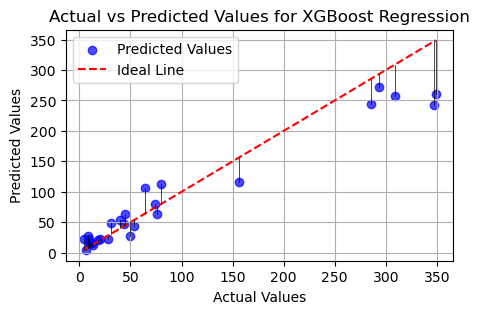

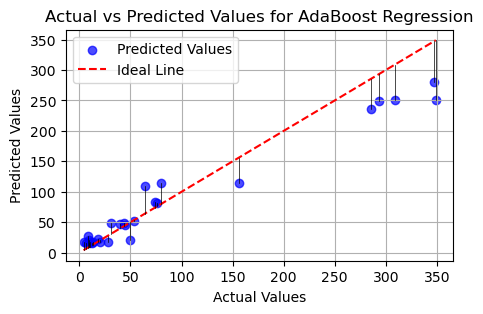

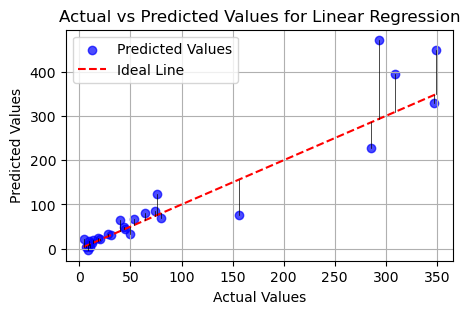

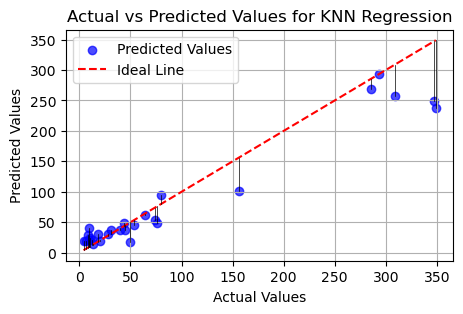

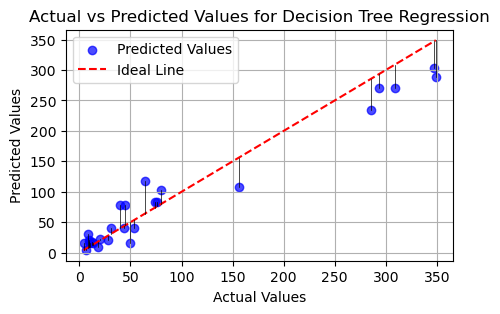

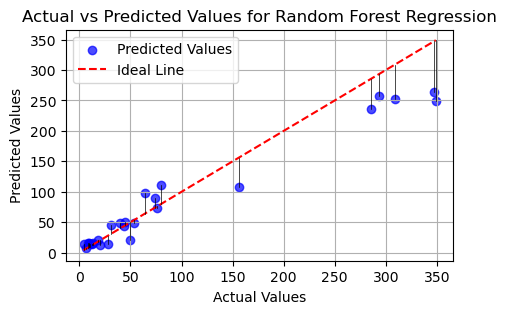

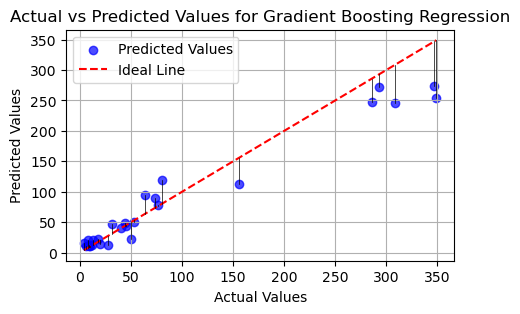

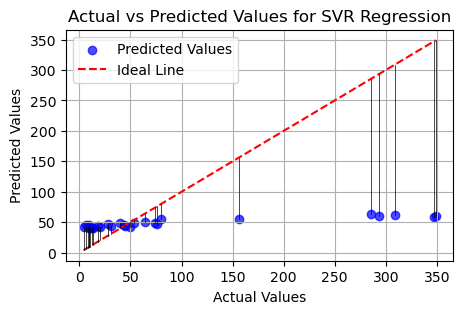

C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


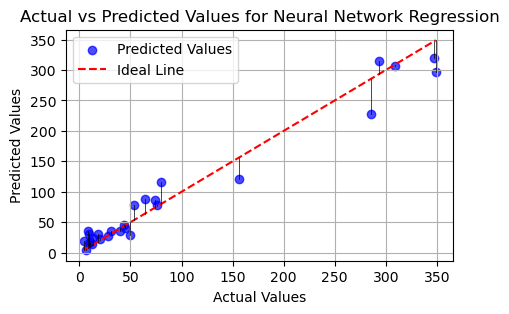

                          Model           MSE        MAE        R2  \
0            XGBoost Regression   1136.897216  22.453031  0.911290   
1           AdaBoost Regression   1079.772154  22.429388  0.915747   
2             Linear Regression   2364.699223  27.366236  0.815487   
3                KNN Regression   1230.964444  22.037037  0.903950   
4      Decision Tree Regression    790.481481  21.592593  0.938320   
5      Random Forest Regression   1124.072111  21.660741  0.912291   
6  Gradient Boosting Regression    979.271625  20.186021  0.923589   
7                SVR Regression  13153.519709  68.312740 -0.026343   
8     Neural Network Regression    510.079048  16.356435  0.960200   

         RMSE         R  
0   33.717906  0.978157  
1   32.859887  0.982467  
2   48.628173  0.949249  
3   35.085103  0.972984  
4   28.115503  0.979321  
5   33.527185  0.982452  
6   31.293316  0.981651  
7  114.688795  0.924306  
8   22.584930  0.983582  


In [31]:
# training base model evaluation on val better visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from scipy.stats import pearsonr

# Define models
random_state = 42
models = [
    (XGBRegressor(random_state=random_state), 'XGBoost Regression'),
    (AdaBoostRegressor(random_state=random_state), 'AdaBoost Regression'),
    (LinearRegression(), 'Linear Regression'),
    (KNeighborsRegressor(), 'KNN Regression'),
    (DecisionTreeRegressor(random_state=random_state), 'Decision Tree Regression'),
    (RandomForestRegressor(random_state=random_state), 'Random Forest Regression'),
    (GradientBoostingRegressor(random_state=random_state), 'Gradient Boosting Regression'),
    (SVR(), 'SVR Regression'),
    (MLPRegressor(random_state=random_state, max_iter=1000), 'Neural Network Regression')
]

# DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2','R'])

# Train, predict and evaluate models
metrics_list = []

for model, name in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    rmse = np.sqrt(mse)
    r, _ = pearsonr(y_val, y_pred)
    
    metrics_list.append({'Model': name, 'MSE': mse, 'MAE': mae, 'R2': r2,'RMSE': rmse,'R':r})
    
    # Plot actual vs predicted values with error bars
    plt.figure(figsize=(5, 3))
    plt.scatter(y_val, y_pred, alpha=0.7, color='blue', label='Predicted Values')
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label='Ideal Line')
    
    # Adding error bars
    for actual, predicted in zip(y_val, y_pred):
        plt.plot([actual, actual], [actual, predicted], 'k-', lw=0.5)
    
    plt.title(f'Actual vs Predicted Values for {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()
    
# Convert list of dictionaries to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display evaluation metrics
print(metrics_df)

Training XGBoost Regression...
Best parameters for XGBoost Regression: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


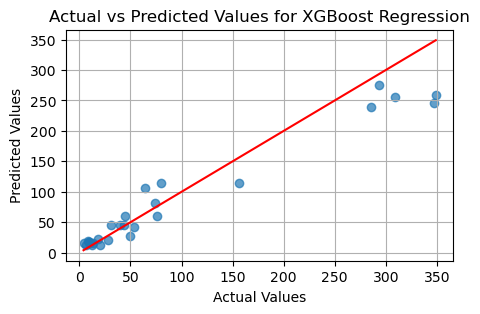

Training AdaBoost Regression...
Best parameters for AdaBoost Regression: {'learning_rate': 0.1, 'n_estimators': 50}


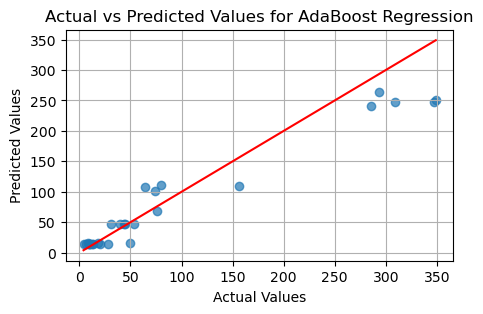

Training KNN Regression...
Best parameters for KNN Regression: {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'distance'}


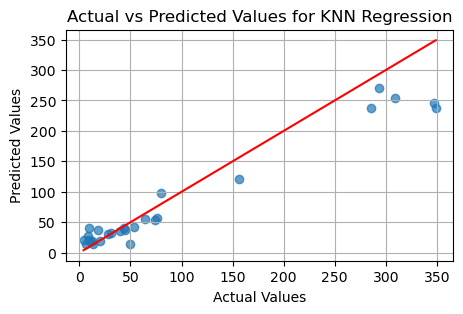

Training Decision Tree Regression...
Best parameters for Decision Tree Regression: {'max_depth': None, 'min_samples_split': 20}


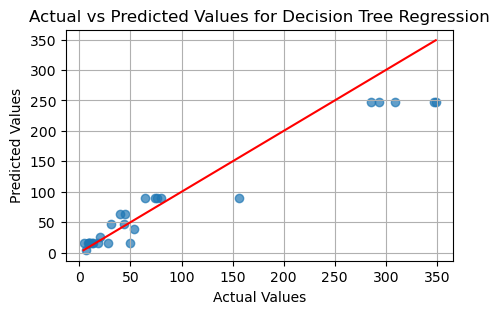

Training Random Forest Regression...
Best parameters for Random Forest Regression: {'max_depth': None, 'min_samples_split': 20, 'n_estimators': 200}


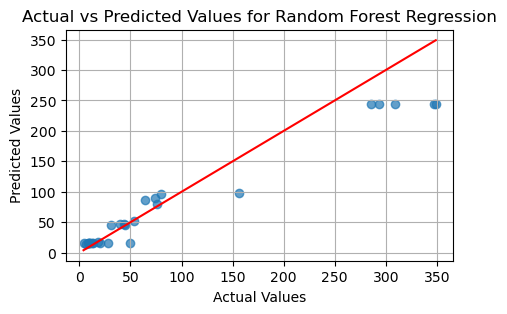

Training Gradient Boosting Regression...
Best parameters for Gradient Boosting Regression: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


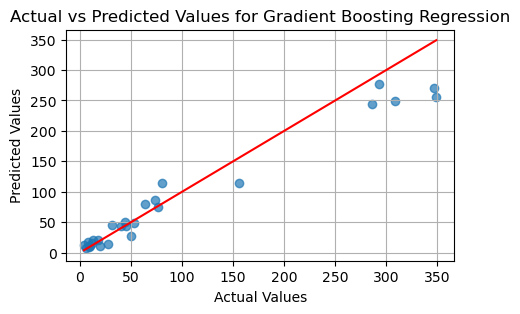

Training SVR Regression...
Best parameters for SVR Regression: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


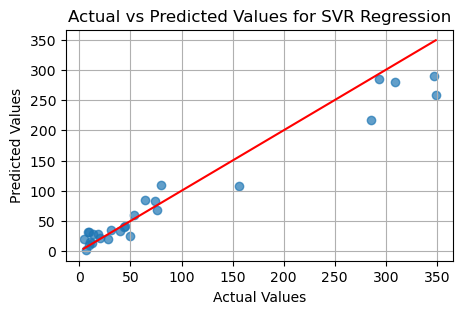

Training Neural Network Regression...


C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for Neural Network Regression: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'solver': 'adam'}


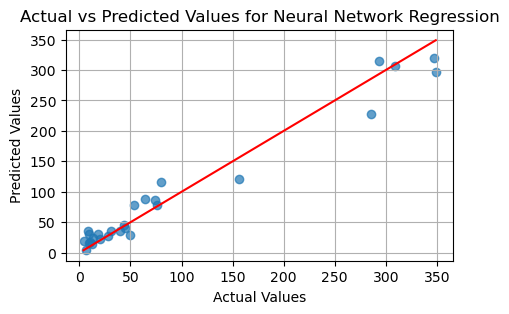

                          Model          MSE        R2        MAE       RMSE  \
0            XGBoost Regression  1126.691031  0.912086  22.126853  33.566219   
1           AdaBoost Regression  1267.892233  0.901069  23.107088  35.607474   
2                KNN Regression  1287.152544  0.899566  23.345219  35.876908   
3      Decision Tree Regression  1364.607553  0.893522  24.436210  36.940595   
4      Random Forest Regression  1364.748619  0.893511  22.773933  36.942504   
5  Gradient Boosting Regression   913.191547  0.928745  18.755059  30.219059   
6                SVR Regression   863.242514  0.932643  19.505687  29.380989   
7     Neural Network Regression   510.079048  0.960200  16.356435  22.584930   

          R  
0  0.978789  
1  0.975653  
2  0.981932  
3  0.977829  
4  0.982144  
5  0.984799  
6  0.982486  
7  0.983582  


In [32]:
# Tuning with parameters on val 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Define models and parameters for GridSearchCV
random_state = 42

models = [
    (XGBRegressor(random_state=random_state), 'XGBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (AdaBoostRegressor(random_state=random_state), 'AdaBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    (KNeighborsRegressor(), 'KNN Regression', {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    }),
    (DecisionTreeRegressor(random_state=random_state), 'Decision Tree Regression', {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (RandomForestRegressor(random_state=random_state), 'Random Forest Regression', {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (GradientBoostingRegressor(random_state=random_state), 'Gradient Boosting Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (SVR(), 'SVR Regression', {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    (MLPRegressor(random_state=random_state, max_iter=1000), 'Neural Network Regression', {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'lbfgs']
    })
]

# DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'R2', 'MAE','RMSE','R'])

# Train, predict and evaluate models
metrics_list = []

for model, name, params in models:
    print(f"Training {name}...")
    kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
    grid_search = GridSearchCV(model, param_grid=params, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best parameters for {name}: {best_params}")
    
    y_pred = best_model.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r, _ = pearsonr(y_val, y_pred)
    
    metrics_list.append({'Model': name, 'MSE': mse, 'R2': r2, 'MAE': mae,'RMSE': rmse,'R':r})
    
    # Plot actual vs predicted values
    plt.figure(figsize=(5, 3))
    plt.scatter(y_val, y_pred, alpha=0.7)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')  # Diagonal line
    plt.title(f'Actual vs Predicted Values for {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Convert list of dictionaries to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display evaluation metrics
print(metrics_df)

In [ ]:
#using lesser features can be relative to coaches using less features to recruit players

Training XGBoost Regression...


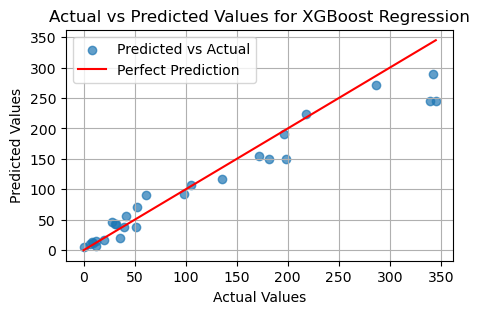

Actual vs Predicted values for XGBoost Regression:
       Actual   Predicted
1344       6   10.151778
381       98   92.378731
423      286  271.898346
375      172  154.675095
3771       0    4.843256
457      339  245.566895
41        51   37.499508
2088     105  106.904213
64        42   55.711143
475      345  245.409332
379      182  149.766190
397      342  288.940216
244        9   11.330062
363      136  116.961525
353      218  223.367813
371      196  190.787674
3819      20   17.158619
3561      40   38.673630
12         8   13.693198
3589      52   71.322968
3621      36   20.695646
3660      12    7.018409
345      198  149.983078
55        28   46.647999
61        32   43.019974
33        31   43.882359
551       61   90.806320
757       12   15.315155
Training AdaBoost Regression...


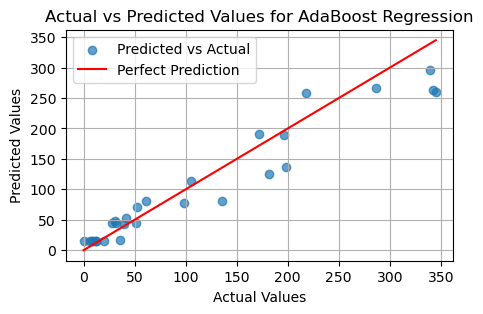

Actual vs Predicted values for AdaBoost Regression:
       Actual   Predicted
1344       6   14.500000
381       98   77.642857
423      286  266.730769
375      172  190.333333
3771       0   14.500000
457      339  295.882353
41        51   44.814815
2088     105  114.117647
64        42   53.666667
475      345  259.363636
379      182  125.307692
397      342  263.153846
244        9   14.600000
363      136   81.000000
353      218  258.809524
371      196  189.714286
3819      20   14.600000
3561      40   42.533333
12         8   14.600000
3589      52   70.333333
3621      36   16.208333
3660      12   14.600000
345      198  137.200000
55        28   45.321429
61        32   44.814815
33        31   47.240000
551       61   81.000000
757       12   14.600000
Training KNN Regression...


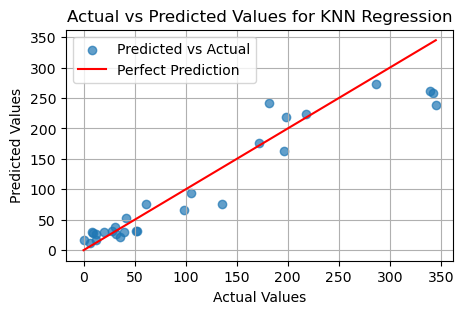

Actual vs Predicted values for KNN Regression:
       Actual   Predicted
1344       6   12.218632
381       98   66.198503
423      286  272.303643
375      172  176.956908
3771       0   17.035673
457      339  261.045651
41        51   32.069701
2088     105   93.969305
64        42   53.421997
475      345  238.344448
379      182  241.304546
397      342  257.981782
244        9   28.678392
363      136   75.530511
353      218  223.061504
371      196  162.958650
3819      20   30.404612
3561      40   29.450982
12         8   29.626072
3589      52   32.323778
3621      36   22.502257
3660      12   16.810837
345      198  218.919253
55        28   30.941500
61        32   27.144730
33        31   37.907928
551       61   76.034199
757       12   27.422309
Training Decision Tree Regression...


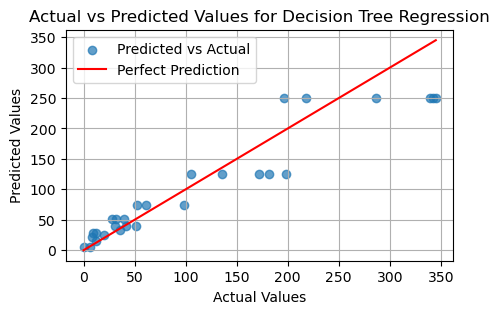

Actual vs Predicted values for Decision Tree Regression:
       Actual   Predicted
1344       6    4.666667
381       98   74.214286
423      286  249.500000
375      172  125.166667
3771       0    4.666667
457      339  249.500000
41        51   39.777778
2088     105  125.166667
64        42   39.777778
475      345  249.500000
379      182  125.166667
397      342  249.500000
244        9   28.000000
363      136  125.166667
353      218  249.500000
371      196  249.500000
3819      20   24.750000
3561      40   51.375000
12         8   22.000000
3589      52   74.214286
3621      36   33.000000
3660      12   28.000000
345      198  125.166667
55        28   51.375000
61        32   51.375000
33        31   39.777778
551       61   74.214286
757       12   14.500000
Training Random Forest Regression...


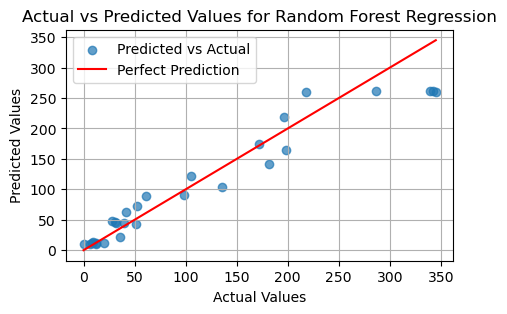

Actual vs Predicted values for Random Forest Regression:
       Actual   Predicted
1344       6   10.621399
381       98   91.278606
423      286  260.920550
375      172  173.998603
3771       0   10.449882
457      339  260.920550
41        51   42.811038
2088     105  122.142571
64        42   62.041071
475      345  260.566939
379      182  141.708181
397      342  260.920550
244        9   12.949691
363      136  104.205574
353      218  260.566939
371      196  218.581206
3819      20   12.496023
3561      40   43.937308
12         8   11.748590
3589      52   72.147833
3621      36   22.435613
3660      12   11.021657
345      198  164.055945
55        28   47.365130
61        32   44.490835
33        31   45.695566
551       61   89.809142
757       12   11.705880
Training Gradient Boosting Regression...


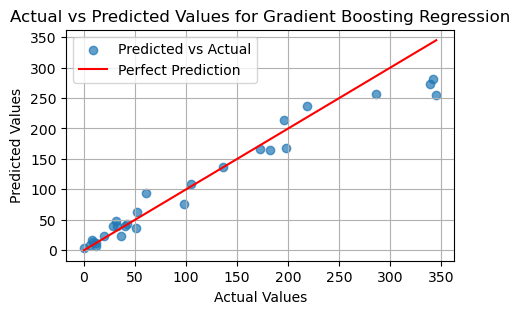

Actual vs Predicted values for Gradient Boosting Regression:
       Actual   Predicted
1344       6    8.127081
381       98   75.476303
423      286  256.901839
375      172  165.937382
3771       0    3.966831
457      339  272.573131
41        51   36.019312
2088     105  108.467007
64        42   42.698678
475      345  255.212795
379      182  164.760053
397      342  280.709790
244        9   13.362600
363      136  137.194824
353      218  237.475064
371      196  214.343496
3819      20   23.102693
3561      40   40.557722
12         8   16.254050
3589      52   62.060859
3621      36   22.964891
3660      12    6.418268
345      198  168.195421
55        28   39.660011
61        32   39.748973
33        31   48.595166
551       61   94.633233
757       12   12.213874
Training SVR Regression...


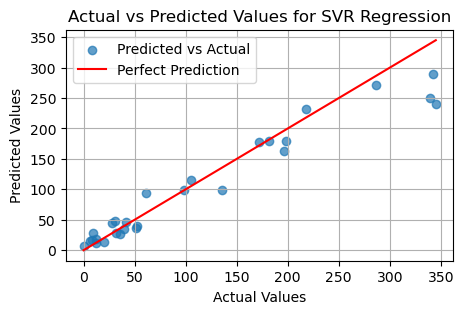

Actual vs Predicted values for SVR Regression:
       Actual   Predicted
1344       6   14.397830
381       98   99.190898
423      286  271.740889
375      172  178.406660
3771       0    7.133866
457      339  249.938891
41        51   36.017264
2088     105  115.275006
64        42   45.585920
475      345  240.452009
379      182  178.972918
397      342  289.584797
244        9   28.356902
363      136   99.382357
353      218  231.621089
371      196  162.585487
3819      20   12.793886
3561      40   35.364176
12         8   17.306756
3589      52   40.031875
3621      36   26.815250
3660      12   17.966922
345      198  178.723567
55        28   44.246403
61        32   28.224913
33        31   48.247004
551       61   94.012253
757       12   12.500719
Training Neural Network Regression...


C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


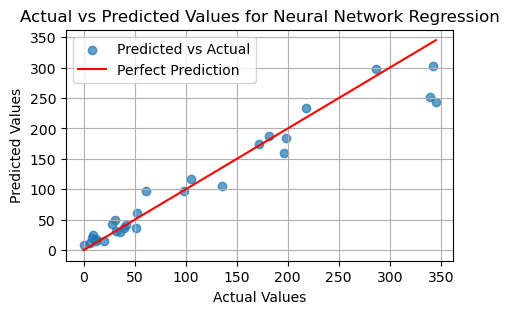

Actual vs Predicted values for Neural Network Regression:
       Actual   Predicted
1344       6   11.780369
381       98   97.774398
423      286  297.216352
375      172  174.954236
3771       0    8.138191
457      339  251.668500
41        51   36.765957
2088     105  117.104388
64        42   41.697196
475      345  243.473519
379      182  187.857995
397      342  302.144124
244        9   24.437241
363      136  105.000788
353      218  233.702385
371      196  160.045231
3819      20   15.889087
3561      40   35.977117
12         8   19.555911
3589      52   61.160814
3621      36   29.557138
3660      12   18.217576
345      198  184.512648
55        28   42.917359
61        32   31.794940
33        31   49.981069
551       61   97.756509
757       12   15.884606
                          Model       RMSE          MSE        MAE        R2  \
0            XGBoost Regression  31.840172  1013.796543  19.949405  0.917301   
1           AdaBoost Regression  33.107872  1096.131218 

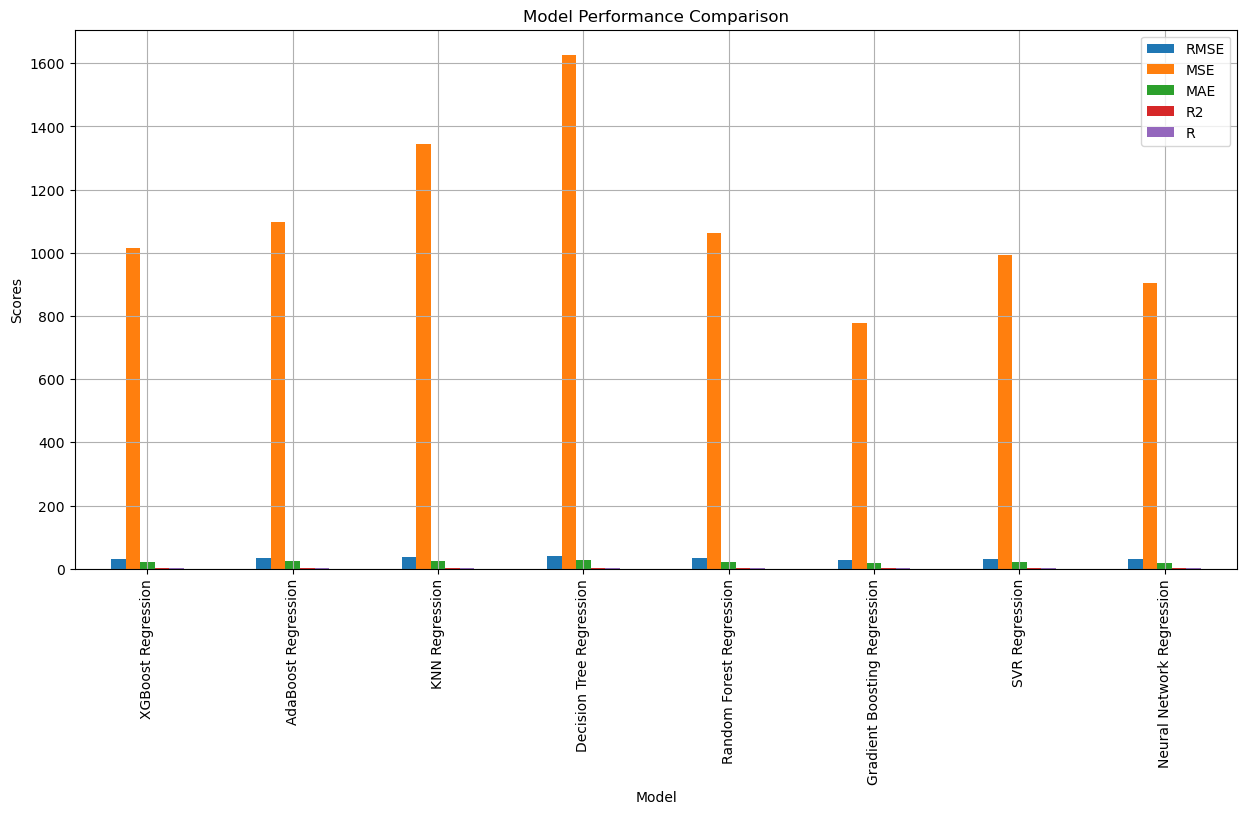

In [33]:
#using the best parameters on train_val and evaluating on tests set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Define models and manually set the parameters
random_state = 42

models = [
    (XGBRegressor(random_state=random_state, n_estimators=100, learning_rate=0.1, max_depth=7), 'XGBoost Regression'),
    (AdaBoostRegressor(random_state=random_state, n_estimators=50, learning_rate=0.1), 'AdaBoost Regression'),
    (KNeighborsRegressor(n_neighbors=7, weights='distance', algorithm='ball_tree'), 'KNN Regression'),
    (DecisionTreeRegressor(random_state=random_state, max_depth=None, min_samples_split=20), 'Decision Tree Regression'),
    (RandomForestRegressor(random_state=random_state, n_estimators=200, max_depth=None, min_samples_split=20), 'Random Forest Regression'),
    (GradientBoostingRegressor(random_state=random_state, n_estimators=200, learning_rate=0.2, max_depth=3), 'Gradient Boosting Regression'),
    (SVR(C=10, kernel='linear', gamma='scale'), 'SVR Regression'),
    (MLPRegressor(random_state=random_state, max_iter=1000, hidden_layer_sizes=(100,), activation='relu', solver='adam'), 'Neural Network Regression')
]

# DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'RMSE', 'MSE', 'MAE', 'R2','R'])

# Train, predict and evaluate models
metrics_list = []

for model, name in models:
    print(f"Training {name}...")
    
    # Retrain the model on the entire train_val set
    model.fit(X_train_val, y_train_val)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r, _ = pearsonr(y_test, y_pred)
    
    metrics_list.append({'Model': name, 'RMSE': rmse, 'MSE': mse, 'MAE': mae, 'R2': r2,'R':r})
    
    # Plot actual vs predicted values
    plt.figure(figsize=(5, 3))
    plt.scatter(y_test, y_pred, alpha=0.7, label='Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction')
    plt.title(f'Actual vs Predicted Values for {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print actual and predicted values
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(f"Actual vs Predicted values for {name}:\n", results)

# Convert list of dictionaries to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display evaluation metrics
print(metrics_df)

# Plot metrics comparison
metrics_df.set_index('Model', inplace=True)
metrics_df.plot(kind='bar', figsize=(15, 7))
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

In [35]:
# Save each DataFrame as a CSV file
X.to_csv('goalkeepers_rating_saves_X.csv', index=False)
y.to_csv('goalkeepers_rating_saves_y.csv', index=False)


print("DataFrames have been saved as CSV files.")

DataFrames have been saved as CSV files.
